In [3]:
import pandas as pd
import re
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(palette="magma_r")

In [4]:
xlsx = pd.ExcelFile('../../data/raw/mar19.xlsx')
xlsx.sheet_names

['1. top_100_brands(brandname+syn',
 '2. reference_color',
 '3. personalization_rules(exampl',
 '4. sample_occasion',
 '5. influencer_color_rules',
 '6. category_and_subcategory',
 '7. user_subset',
 '8. item_subset',
 '9. category_ids',
 '10. brands_affinity',
 '11. styling_segments',
 '12. wishlist_items',
 '13. user_influencer',
 '14. 100_users_set',
 '15. 100_users_item_set',
 '16. 100_user_influencer']

In [5]:
# Variables to avoid hardcoding of sheet names which might change later
top_brands_sheet = "1. top_100_brands(brandname+syn"
category_sheet = "9. category_ids"
user_sheet = "14. 100_users_set"
items_sheet = "15. 100_users_item_set"
wishlist_sheet = "12. wishlist_items"
influencer_sheet = "16. 100_user_influencer"
refcolor_sheet = "2. reference_color"

# Load colors 

In [6]:
color_ref = xlsx.parse(refcolor_sheet)

# color_ref = pd.read_csv("Finery X NYCDSA UI of the Future - 2. reference_color.csv")

df_color = color_ref["colorname0"].unique()
df_color
# items["item_name_lower"] = items["item_name_lower"].fillna("Nan")
# items["color_parsed"] = items["color_parsed"].fillna("Nan")
# items["color_parsed"] = [e.lower() for e in items["color_parsed"]]



array(['white', 'aliceblue', 'antiquewhite', 'aquamarine', 'azure',
       'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet',
       'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate',
       'coral', 'cornflowerblue', 'cornsilk', 'cyan', 'darkblue',
       'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey',
       'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange',
       'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
       'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise',
       'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey',
       'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen',
       'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green',
       'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'ivory',
       'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon',
       'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrod',
       'lightgoldenrodyel

# Load Category ID data

In [7]:
df_cat = xlsx.parse(category_sheet)

df_cat.dropna(inplace=True)
df_cat["Category ID"] = df_cat["Category ID"].astype("int64")
df_cat.head()

,Category Name,Category ID
0,Tops,110
1,Blouses,111
2,T Shirts,112
3,Tanks,113
4,Knits,114


# Load unique brandID strings for top brands

In [8]:
df_topbrands = xlsx.parse(top_brands_sheet)
df_topbrands = df_topbrands["brand_name"].append(df_topbrands["brand_name_synonym"]).map(lambda x : "".join(x.split()).lower()).drop_duplicates().sort_values().reset_index(drop=True)
df_topbrands.sample(15)


18               boohoo
102                tibi
12       badgleymischka
95           stella&dot
35         fashionnova.
100        thenorthface
5       americanapparel
75      newyork&company
31             everlane
8         anthropologie
120         warbyparker
110              uniqlo
59               llbean
1      abercrombiefitch
104                toms
dtype: object

# Load influencer data to attach to users 

In [9]:
influencers = [
    "ariellecharnas",
    "blaireadiebee",
    "blakevond",
    "chiaraferragni",
    "hannahbronfman",
    "jordynwoods",
    "manrepeller",
    "mayemusk",
    "nicolettemason",
    "seaofshoes",
    "somethingnavy",
    "weworewhat"
]

df_influencers = xlsx.parse(influencer_sheet)
df_influencers["user_id"] = df_influencers["user_id"].map(lambda x : x[-13:])
df_influencers["influencers"] = df_influencers["style_who_inspiries"].map(lambda x : [1 if re.search(i,x) else 0 for i in influencers ])
df_influencers[influencers] = pd.DataFrame(df_influencers["influencers"].values.tolist(), index = df_influencers.index)
df_influencers.drop(["style_who_inspiries", "influencers"], axis =1, inplace=True)
df_influencers.fillna(0,inplace=True)

In [10]:
df_influencers.head()

,user_id,ariellecharnas,blaireadiebee,blakevond,chiaraferragni,hannahbronfman,jordynwoods,manrepeller,mayemusk,nicolettemason,seaofshoes,somethingnavy,weworewhat
0,1533990431896,0,0,0,1,0,0,0,0,0,0,0,0
1,1534260940406,0,0,0,0,0,1,0,0,0,0,0,0
2,1531245193619,0,0,0,0,0,0,0,0,0,0,0,1
3,1544462534443,0,0,0,0,0,0,0,0,1,0,0,1
4,1528762526242,0,0,0,1,0,0,0,0,0,0,0,0


# User data EDA

In [11]:
df_users = xlsx.parse(user_sheet)

df_users.columns

Index(['user_id', 'first_name', 'last_name', 'address_zip', 'gender',
       'signup_date', 'date_last_login', 'visited_wishlist',
       'visited_shopping', 'finished_approval', 'has_shared', 'safari_ext',
       'chrome_ext', 'firefox_ext', 'registered', 'push_enabled',
       'subscribed_onboarding_emails', 'subscribed_onsale_alerts',
       'subscribed_return_reminders', 'subscribed_finery_updates',
       'subscribed_misc_emails', 'subscribed_no_emails',
       'wishlist_notifications', 'timezone', 'set_avatar', 'style_age_range',
       'style_age_range_group', 'items_in_wardrobe', 'items_in_wishlist',
       'location_latitude', 'location_longitude', 'notifications_enabled_ios',
       'style_brands_selected', 'style_size_preference_none',
       'style_size_preference_petite', 'style_size_preference_extra_long',
       'style_size_preference_plus', 'style_size_preference_maternity',
       'style_size_preference_skipped', 'email_provided',
       'notifications_enabled_desktop'

In [12]:
df_users = xlsx.parse(user_sheet)

user_fields = [
    "user_id",
    "style_age_range",
    "style_age_range_group",
    "items_in_wishlist",
    "style_brands_selected",
    "style_size_preference_none",
    "style_size_preference_petite",
    "style_size_preference_extra_long",
    "style_size_preference_plus",
    "style_size_preference_maternity",
    "style_size_preference_skipped",
    "style_vibe",
    "has_stype_vibe",
    "style_who_inspiries_skipped",
    "style_looks_wanted_dates",
    "style_looks_wanted_everyday",
    "style_looks_wanted_formal",
    "style_looks_wanted_nights",
    "style_looks_wanted_other",
    "style_looks_wanted_summer",
    "style_looks_wanted_travel",
    'style_looks_wanted_winter',
    "style_looks_wanted_work",
    "style_looks_wanted_workouts",
    "style_looks_wanted_skipped",
    'style_most_important_active', 
    'style_most_important_any',
    'style_most_important_beach', 
    'style_most_important_dress',
    'style_most_important_bags', 
    'style_most_important_jeans',
    'style_most_important_jump', 
    'style_most_important_nothing',
    'style_most_important_outwear', 
    'style_most_important_pants',
    'style_most_important_shoes', 
    'style_most_important_tops',
    'style_most_important_skipped'
    ]

df_users = df_users[user_fields]
df_users["user_id"] = df_users["user_id"].map(lambda x : x[-13:])
df_users["style_age_range_group"] = df_users["style_age_range_group"].fillna(5)
df_users["style_vibe"] = df_users["style_vibe"].fillna("None")

user_fillna_zero_columns = [
    "style_size_preference_none",
    "style_size_preference_petite",
    "style_size_preference_extra_long",
    "style_size_preference_plus",
    "style_size_preference_maternity",
    "style_looks_wanted_dates",
    "style_looks_wanted_everyday",
    "style_looks_wanted_formal",
    "style_looks_wanted_nights",
    "style_looks_wanted_other",
    "style_looks_wanted_summer",
    "style_looks_wanted_travel",
    'style_looks_wanted_winter',
    "style_looks_wanted_work",
    "style_looks_wanted_workouts",
    'style_most_important_active', 
    'style_most_important_any',
    'style_most_important_beach', 
    'style_most_important_dress',
    'style_most_important_bags', 
    'style_most_important_jeans',
    'style_most_important_jump', 
    'style_most_important_nothing',
    'style_most_important_outwear', 
    'style_most_important_pants',
    'style_most_important_shoes', 
    'style_most_important_tops',
    'style_most_important_skipped'
]
df_users[user_fillna_zero_columns] = df_users[user_fillna_zero_columns].fillna(0)

user_drop_columns = [
    "style_age_range",
    "style_brands_selected",
    "has_stype_vibe",
    "style_who_inspiries_skipped",
    "items_in_wishlist"
]
df_users.drop(user_drop_columns, axis=1, inplace=True)

user_int_conversion_columns = [
    "style_age_range_group",
    "style_size_preference_none",
    "style_size_preference_petite",
    "style_size_preference_extra_long",
    "style_size_preference_plus",
    "style_size_preference_maternity",
    "style_size_preference_skipped",
    "style_looks_wanted_dates",
    "style_looks_wanted_everyday",
    "style_looks_wanted_formal",
    "style_looks_wanted_nights",
    "style_looks_wanted_other",
    "style_looks_wanted_summer",
    "style_looks_wanted_travel",
    'style_looks_wanted_winter',
    "style_looks_wanted_work",
    "style_looks_wanted_workouts",
    "style_looks_wanted_skipped",
    'style_most_important_active', 
    'style_most_important_any',
    'style_most_important_beach', 
    'style_most_important_dress',
    'style_most_important_bags', 
    'style_most_important_jeans',
    'style_most_important_jump', 
    'style_most_important_nothing',
    'style_most_important_outwear', 
    'style_most_important_pants',
    'style_most_important_shoes', 
    'style_most_important_tops',
    'style_most_important_skipped'
]
df_users[user_int_conversion_columns] = df_users[user_int_conversion_columns].astype("int64")


df_users = pd.merge(df_users,df_influencers,left_on="user_id",right_on="user_id", how="left")
df_users[influencers] = df_users[influencers].fillna(0).astype("int64")
df_users.sample(5)

,user_id,style_age_range_group,style_size_preference_none,style_size_preference_petite,style_size_preference_extra_long,style_size_preference_plus,style_size_preference_maternity,style_size_preference_skipped,style_vibe,style_looks_wanted_dates,style_looks_wanted_everyday,style_looks_wanted_formal,style_looks_wanted_nights,style_looks_wanted_other,style_looks_wanted_summer,style_looks_wanted_travel,style_looks_wanted_winter,style_looks_wanted_work,style_looks_wanted_workouts,style_looks_wanted_skipped,style_most_important_active,style_most_important_any,style_most_important_beach,style_most_important_dress,style_most_important_bags,style_most_important_jeans,style_most_important_jump,style_most_important_nothing,style_most_important_outwear,style_most_important_pants,style_most_important_shoes,style_most_important_tops,style_most_important_skipped,ariellecharnas,blaireadiebee,blakevond,chiaraferragni,hannahbronfman,jordynwoods,manrepeller,mayemusk,nicolettemason,seaofshoes,somethingnavy,weworewhat
75,1528341308287,0,0,0,0,0,0,0,McDonough,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
64,1515379240540,5,0,0,0,0,0,1,None,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
73,1537656557616,1,0,0,0,0,0,0,Lexington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0
82,1534460607725,0,0,1,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24,1538200804467,3,0,1,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
""" This is a concern to be addressed """

df_users.duplicated(df_users.columns[1:]).sum()

25

In [14]:
"""Style vibe hardly repeats (about 6). Having so many values will throw the model off once numeric encoded, 
as there is not enough repetition across observations 
This column in current state is not worth cleaning 
"""
df_users.style_vibe.value_counts()

None                          37
Overland Park                  2
Chicago                        2
San Francisco                  2
Buffalo                        2
New York                       2
Newfield                       1
The Woodlands                  1
Fort Payne                     1
Oshawa                         1
Miami Springs                  1
Oxford                         1
Elgin                          1
Goshen                         1
Dubuque                        1
West Caldwell                  1
Beverly                        1
Durham                         1
Portsmouth                     1
Logan                          1
Pennsylvania                   1
Durham, NC 27713, USA          1
Cincinnati                     1
Monroe                         1
Lake Buena Vista               1
Emory                          1
Montgomery Village             1
Bastrop                        1
Reno                           1
Dover                          1
South Bend

In [15]:
df_users.drop("style_vibe", inplace=True, axis =1)

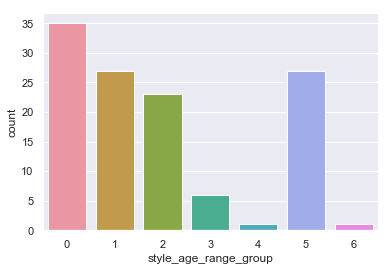

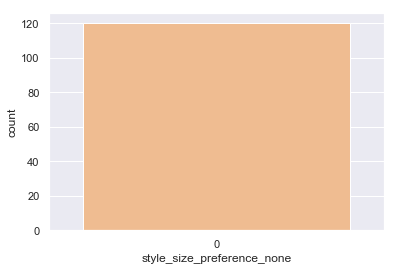

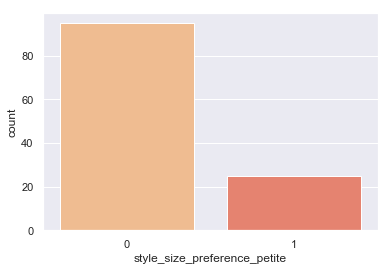

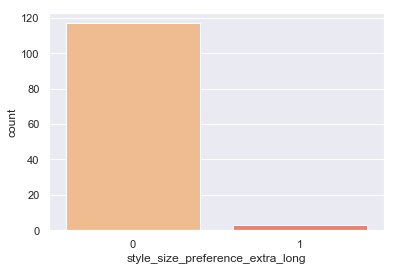

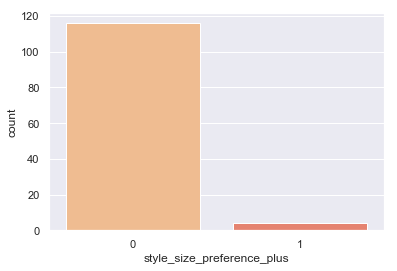

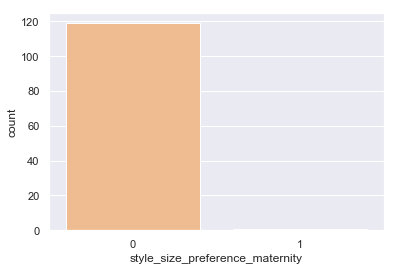

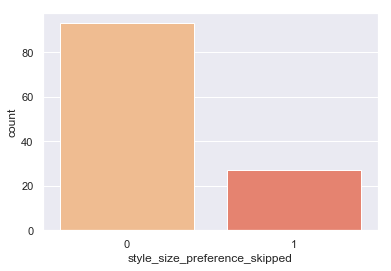

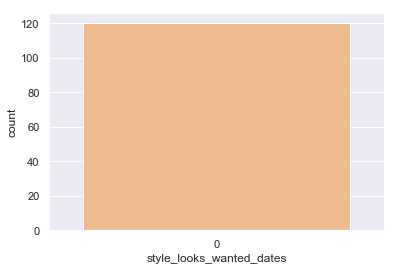

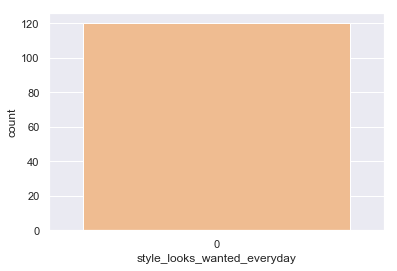

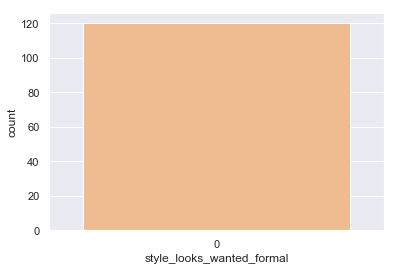

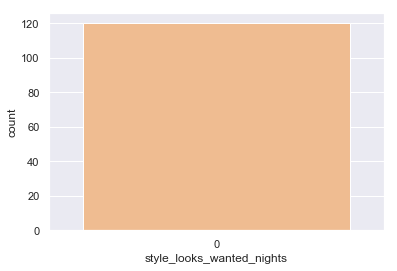

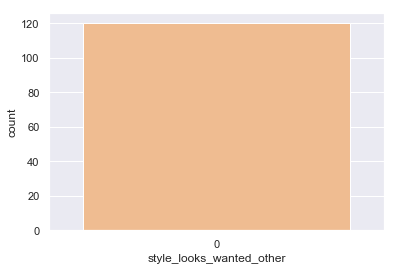

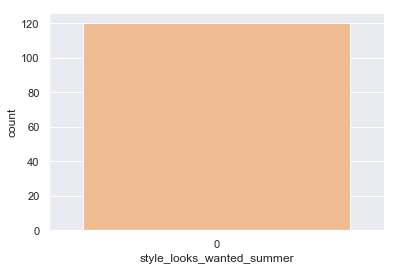

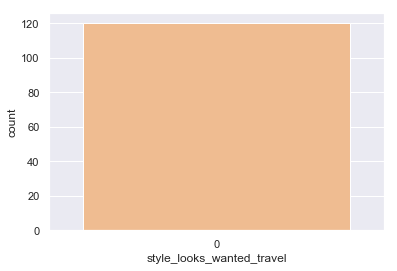

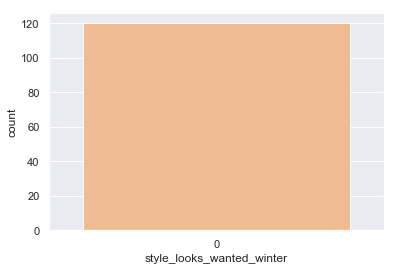

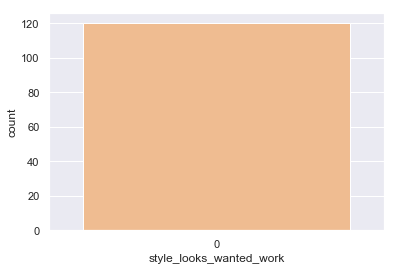

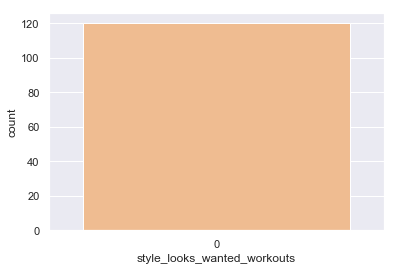

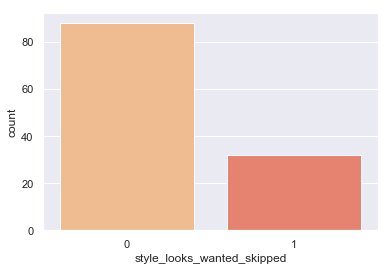

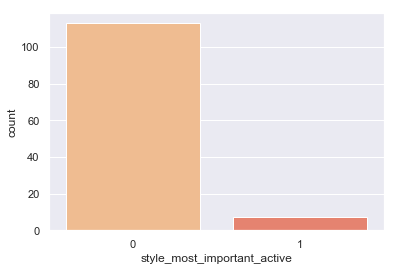

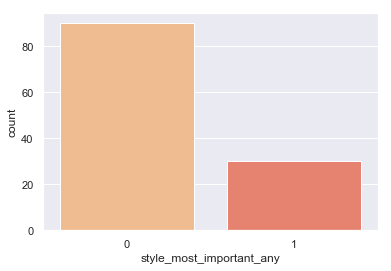

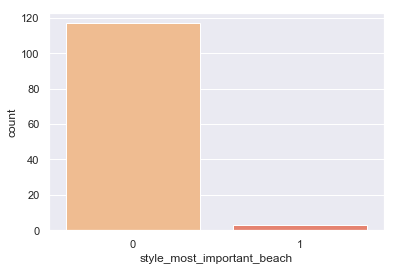

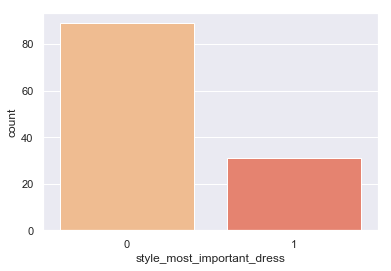

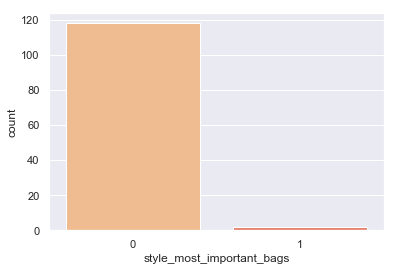

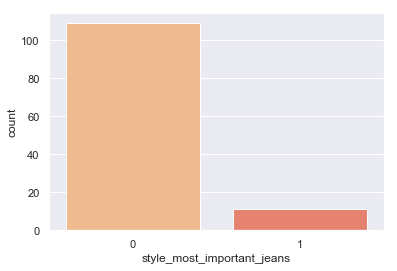

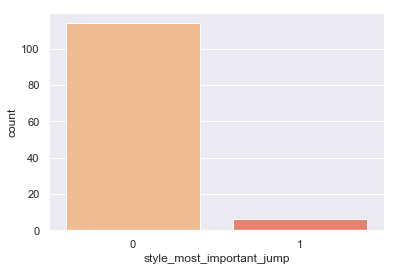

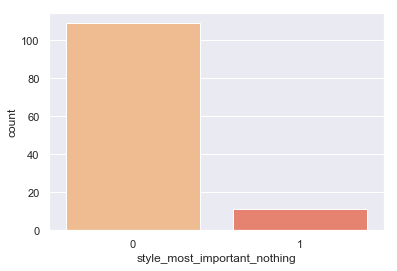

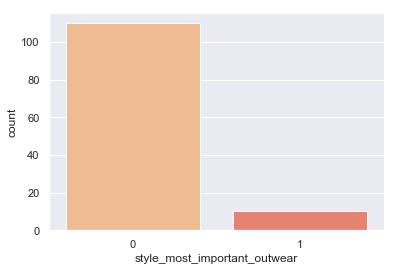

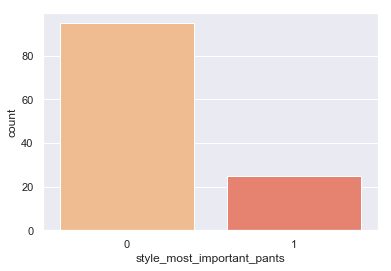

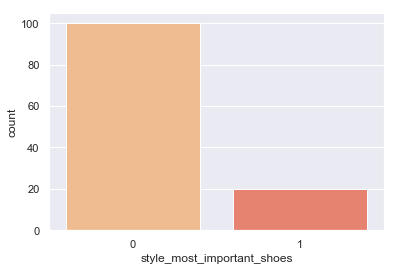

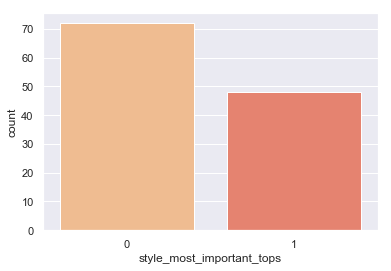

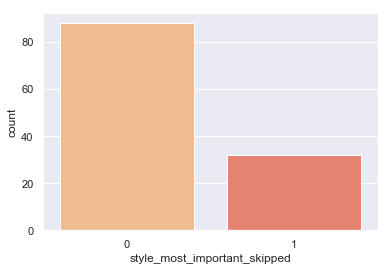

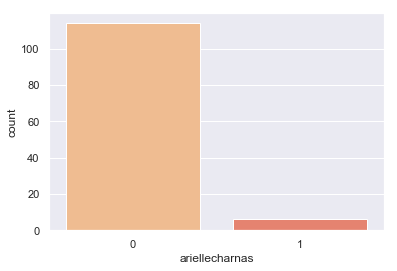

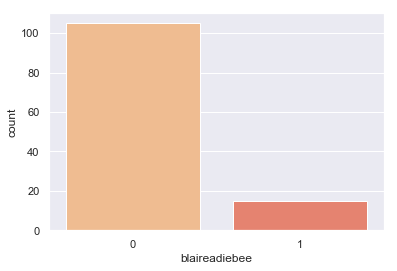

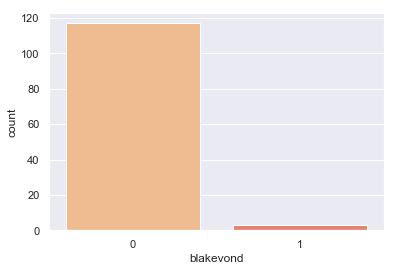

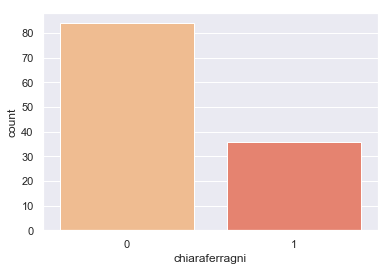

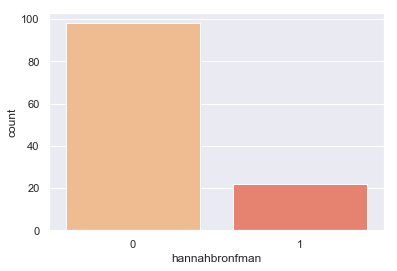

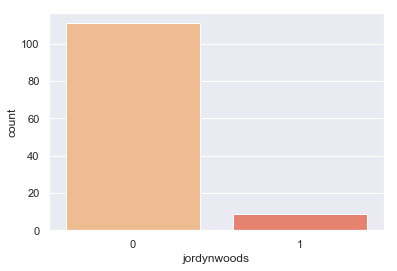

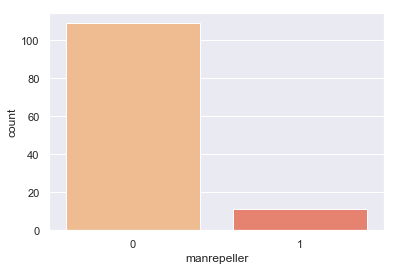

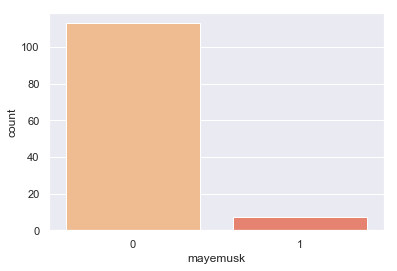

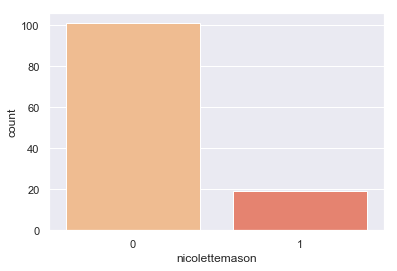

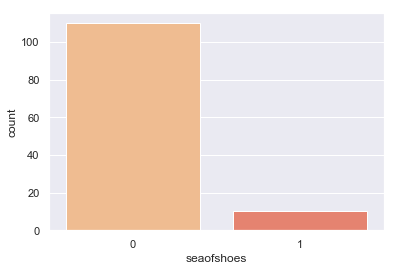

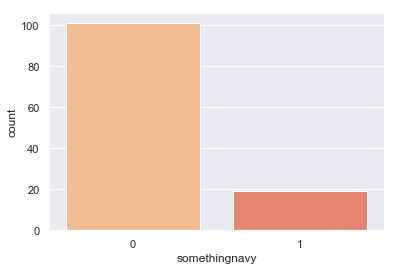

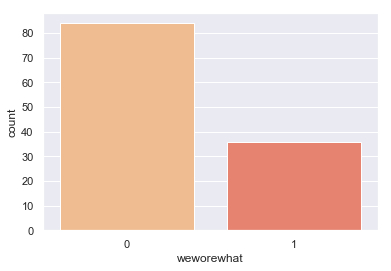

In [16]:
"""
style_looks wanted columns seem interesting, but useless as none of the users have any data.
The best we can possibly do here is to impute 
"""

for i in df_users.columns[1:]:
    temp = df_users[i].value_counts().reset_index()
    sns.countplot(x=i,  data=df_users)
    plt.show()

In [17]:
"""
placeholder to impute style looks wanted columns
for now drop the columns
"""

style_looks_columns = [
    "style_looks_wanted_dates",
    "style_looks_wanted_everyday",
    "style_looks_wanted_formal",
    "style_looks_wanted_nights",
    "style_looks_wanted_other",
    "style_looks_wanted_summer",
    "style_looks_wanted_travel",
    'style_looks_wanted_winter',
    "style_looks_wanted_work",
    "style_looks_wanted_workouts",
] 

df_users.drop(style_looks_columns, axis=1, inplace=True)

# EDA for Item Data

In [23]:
item_columns_tokeep = [
        'user_id', 'brand_id', 'user_provided_brand_name', 'parsed_brand_name',
        'store_id', 'user_provided_store_name','parsed_store_name','product_id', 
        'item_name_lower', 'product_category_id', 'paid_price',
        'list_price', 'sale_price',
        'order_total_amt', 'size', 'email_dt', 'color_parsed']

""" usecols not working. Seems to be a bug"""
df_items = xlsx.parse(items_sheet)
df_items = df_items[item_columns_tokeep]


df_items["user_id"] = df_items["user_id"].map(lambda x : x[-13:])

##Dropping rows with null product ID
df_items = df_items[~df_items["product_id"].isnull()]
df_items["product_id"] = df_items["product_id"].map(lambda x : x[-8:])


df_items["product_category_id"].fillna(0, inplace=True)
df_items["product_category_id"] = df_items["product_category_id"].astype("int64")


##Adding "on sale" column indicate a purchase of item in sale 
df_items["on_sale"] = df_items["sale_price"].map(lambda x : True if x > 0 else False)
df_items["part_of_order"] = df_items.apply(lambda x : True if x["order_total_amt"] > x["paid_price"] else False, axis=1)

##Get brand id with blank from other two brand columns when avaialble, else set to None
df_items["brand_id"] = df_items["brand_id"].fillna(df_items["parsed_brand_name"])
df_items["brand_id"] = df_items["brand_id"].fillna(df_items["user_provided_brand_name"])
condition = pd.notnull(df_items["brand_id"])
df_items.loc[condition,"brand_id"] = df_items.loc[condition,"brand_id"].map(lambda x : "".join(x.split()).lower())

df_items["brand_id"].fillna("None", inplace=True)

##Get store id with blank from other two brand columns when avaialble, else set to None
df_items["store_id"] = df_items["store_id"].fillna(df_items["parsed_store_name"])
df_items["store_id"] = df_items["store_id"].fillna(df_items["user_provided_store_name"])
condition = pd.notnull(df_items["brand_id"])
df_items.loc[condition,"store_id"] = df_items.loc[condition,"store_id"].map(lambda x : "".join(x.split()).lower())

##Set store id ro Brand ID when null
# condition = pd.isnull(df_items["store_id"])
# df_items.loc[condition,"store_id"] = df_items.loc[condition,"brand_id"]

df_items["store_id"] = df_items["store_id"].fillna(df_items["brand_id"])

## Set store ID to none if still not available
df_items["store_id"].fillna("None", inplace=True)
df_items["top_brand"] = df_items["store_id"].map(lambda x : True if x in df_topbrands.values.tolist() else False )



df_items["item_name_lower"] = df_items["item_name_lower"].fillna("None")
df_items["item_name_lower"] = df_items["item_name_lower"].map(lambda x : str(x).lower())

df_items["color_parsed"] = df_items["color_parsed"].fillna("None")
df_items["color_parsed"] = df_items["color_parsed"].map(lambda x : str(x).lower())

# df_items["item_name_lower"] = df_items["item_name_lower"].fillna("None")
# df_items["color_parsed"] = df_items["color_parsed"].fillna("None")
# df_items["color_parsed"] = df_items["color_parsed"].str.lower()

color_parse_lst = [set(str(e)) for e in df_items["color_parsed"].str.split()]
df_items["color"] = [e&set(df_color) for e in color_parse_lst]
df_items["color"] = [list(e)[0] if len(list(e))!=0 else "" for e in df_items["color"]]


color_ntlst = [set(e) for e in df_items["item_name_lower"].str.split()]
df_items["color_tmp1"] = [e&set(df_color) for e in color_ntlst]
df_items["color_tmp1"] = [list(e)[0] if len(list(e))!=0 else "" for e in df_items["color_tmp1"]]

df_items["color"] = df_items["color"].replace('', df_items["color_tmp1"])

item_drop_columns = [
    "sale_price",
    "order_total_amt",
    "user_provided_brand_name",
    "parsed_brand_name",
    "user_provided_store_name",
    "parsed_store_name",
    "email_dt",
    "list_price",
    "color_tmp1"
]
df_items.drop(item_drop_columns, axis = 1,inplace=True)

df_items.sample(5)


,user_id,brand_id,store_id,product_id,item_name_lower,product_category_id,paid_price,size,color_parsed,on_sale,part_of_order,top_brand,color
11900,1490404459978,None,nordstrom,62791d71,bp. check scarf,430,24.0,One Size,ivory,False,False,False,
5073,1531873923973,rebeccataylor,renttherunway,b4911182,black drawstring relax dress,141,0.0,0,none,False,False,False,black
3022,1537259845783,onlineonly,ulta,2a8561b8,online onlyvariety sampler pack let us pick so...,500,0.0,NaN,none,False,False,False,
1389,1485369350003,oldnavy,oldnavy,2a394e13,maternity fitted firstlayer,0,9.0,M,bright white,False,False,True,
2381,1495117820151,None,sephora,68e39a3c,nars rdn crm cnclr crmbrl,500,0.0,30,none,False,False,True,


In [ ]:
""" Seems like this part of order column can be dropped"""
df_items.part_of_order.value_counts()

In [ ]:
""" Leave on sale as is for now"""
df_items.on_sale.value_counts()

In [ ]:
""" Category ID have lot of in correct values. Drop the rows with category ID that is not present in master list"""
df_items.product_category_id.value_counts()

In [24]:
condition = df_items.product_category_id.map( lambda x : x in df_cat["Category ID"].values.tolist())
df_items = df_items[condition]

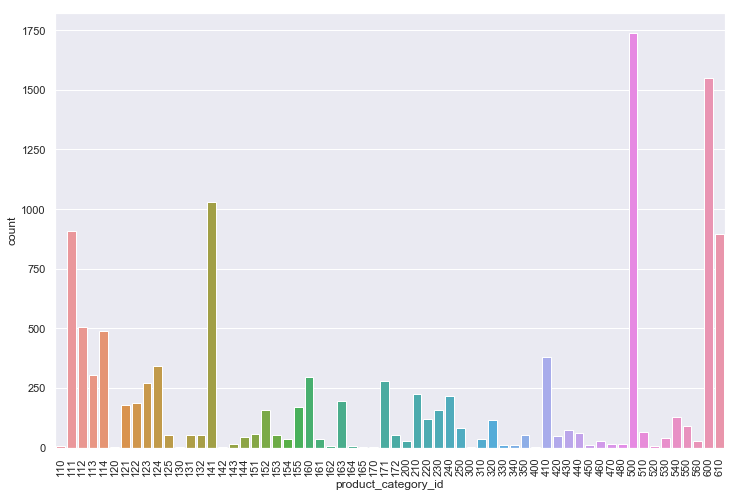

In [25]:
plt.figure(figsize=(12,8))
g = sns.countplot(df_items.product_category_id)
loc, labels = plt.xticks(rotation=90)

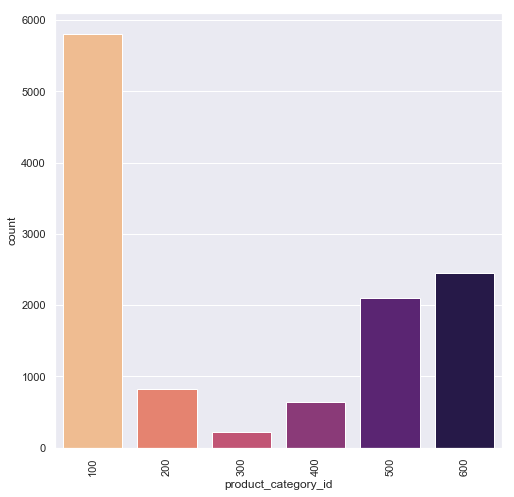

In [26]:
major_cats = (df_items.product_category_id//100)*100
plt.figure(figsize=(8,8))
g = sns.countplot(major_cats)
loc, labels = plt.xticks(rotation=90)

In [ ]:
df_items.sample(8)

In [ ]:
# wishlist_columns_tokeep = [
    
# ]
# df_wish = xlsx.parse(wishlist_sheet)
# df_wish["user_id"] = df_wish["userid"].map(lambda x : x[-13:])
# df_wish["product_id"] = df_wish["itemid"].map(lambda x : x[-8:])

# wish_drop_columns = [
#     "userid", "itemid"
# ]
# df_wish.drop(wish_drop_columns, axis=1, inplace=True)

# df_wish.head()

In [27]:
len(df_items.brand_id.unique())

744

In [ ]:
df_items.store_id.unique()

In [ ]:
df_items.head()

In [ ]:
df_items.columns



In [ ]:
df_items.product_id.value_counts()[:30]

In [ ]:
df_items.drop("email_dt", inplace=True, axis=1)
df_items = df_items.drop_duplicates()

In [ ]:
df_items.product_id.value_counts()[:30]

In [ ]:
df_items = df_items[df_items["product_category_id"] <600]

In [ ]:
df_items.product_id.value_counts()[:30]

In [ ]:
len(df_items.user_id.unique())

In [ ]:
df_items.paid_price.value_counts()

In [ ]:
## Write dataframe to CSV file
df_users.to_csv("../..//data/processed/users.csv",index=False)

In [28]:
pivot = df_items.groupby(["user_id", "store_id", "product_category_id"])[["product_id"]].count().reset_index()
pivot["items"] = pivot["store_id"] + " " + [str(e).strip() for e in pivot["product_category_id"]]
pivot = pivot.drop(["store_id", "product_category_id"], axis= 1)

In [32]:
u_i_matrix = pivot.pivot_table(values = "product_id", index = "user_id", columns = "items")

In [37]:
u_i_matrix.shape

(96, 1656)

In [71]:
from surprise import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import accuracy
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [47]:
data = Dataset.load_builtin('ml-100k')

In [62]:
pivot["rating"] = pivot["product_id"]
pivot = pivot.drop("product_id", axis = 1)
pivot.columns = ["userID", "itemID", "rating"]

KeyError: 'product_id'

In [63]:
pivot.columns = ["userID", "itemID", "rating"]

In [66]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(pivot,reader)

In [67]:
trainset, testset = train_test_split(data, test_size=.25)

In [131]:
algo = SVD(n_factors=5)
algo.fit(trainset)
pre = algo.test(testset)
accuracy.rmse(pre)

RMSE: 6.9472


6.947187548817943

In [72]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    5.9483  7.3006  6.0814  9.6260  7.7276  7.3368  1.3340  
MAE (testset)     2.2058  2.4316  2.4557  2.6253  2.4704  2.4378  0.1345  
Fit time          0.20    0.17    0.17    0.22    0.18    0.19    0.02    
Test time         0.01    0.00    0.01    0.01    0.00    0.00    0.00    


{'test_rmse': array([5.94832687, 7.30057555, 6.08140208, 9.62601848, 7.72760522]),
 'test_mae': array([2.20583339, 2.43158176, 2.45566068, 2.62530933, 2.47041938]),
 'fit_time': (0.19988799095153809,
  0.17136383056640625,
  0.16691994667053223,
  0.22482776641845703,
  0.1834731101989746),
 'test_time': (0.005350828170776367,
  0.0043752193450927734,
  0.005554914474487305,
  0.005242109298706055,
  0.004442691802978516)}

In [83]:
algo = algo.fit(trainset)

In [78]:
dir(algo)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bi',
 'biased',
 'bsl_options',
 'bu',
 'compute_baselines',
 'compute_similarities',
 'default_prediction',
 'estimate',
 'fit',
 'get_neighbors',
 'init_mean',
 'init_std_dev',
 'lr_bi',
 'lr_bu',
 'lr_pu',
 'lr_qi',
 'n_epochs',
 'n_factors',
 'predict',
 'pu',
 'qi',
 'random_state',
 'reg_bi',
 'reg_bu',
 'reg_pu',
 'reg_qi',
 'sgd',
 'sim_options',
 'skip_train',
 'test',
 'train',
 'trainset',
 'verbose']

In [84]:
algo.pu.shape

(94, 5)

In [98]:
algo.predict(1485369350003, "freepeople 600")

Prediction(uid=1485369350003, iid='freepeople 600', r_ui=None, est=2.683606088761657, details={'was_impossible': False})

In [97]:
algo.test(testset)

[Prediction(uid='1534445874747', iid='oldnavy 152', r_ui=2.0, est=3.3802816455976563, details={'was_impossible': False}),
 Prediction(uid='1538878832558', iid='forever21 124', r_ui=1.0, est=1.8327993691219653, details={'was_impossible': False}),
 Prediction(uid='1528762526242', iid='americaneagleoutfitters 171', r_ui=5.0, est=2.535790686785816, details={'was_impossible': False}),
 Prediction(uid='1541778813846', iid='boden 161', r_ui=1.0, est=2.7293210145011826, details={'was_impossible': False}),
 Prediction(uid='1514483609267', iid='nordstrom 123', r_ui=4.0, est=3.76958163133287, details={'was_impossible': False}),
 Prediction(uid='1549462213888', iid='jcrew 111', r_ui=1.0, est=3.3749764098196273, details={'was_impossible': False}),
 Prediction(uid='1544462534443', iid='americaneagleoutfitters 141', r_ui=1.0, est=1.8994668063394249, details={'was_impossible': False}),
 Prediction(uid='1539389830936', iid='bhldn 144', r_ui=3.0, est=2.546532206680671, details={'was_impossible': False})

In [91]:
pivot

,userID,itemID,rating
0,1485369350003,boden 610,2
1,1485369350003,carters 610,14
2,1485369350003,dsw 210,2
3,1485369350003,gap 610,11
4,1485369350003,hm 124,1
5,1485369350003,jcrewfactory 111,1
6,1485369350003,jcrewfactory 114,1
7,1485369350003,loft 111,5
8,1485369350003,loft 112,3
9,1485369350003,loft 114,15


In [101]:
dir(trainset

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_global_mean',
 '_inner2raw_id_items',
 '_inner2raw_id_users',
 '_raw2inner_id_items',
 '_raw2inner_id_users',
 'all_items',
 'all_ratings',
 'all_users',
 'build_anti_testset',
 'build_testset',
 'global_mean',
 'ir',
 'knows_item',
 'knows_user',
 'n_items',
 'n_ratings',
 'n_users',
 'offset',
 'rating_scale',
 'to_inner_iid',
 'to_inner_uid',
 'to_raw_iid',
 'to_raw_uid',
 'ur']

In [133]:
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [148]:
from collections import defaultdict
get_top_n(pre, 20)

defaultdict(list,
            {'1534445874747': [('oldnavy 113', 4.297762304861925),
              ('oldnavy 600', 3.9851568590553237),
              ('express 141', 3.9713706922539327),
              ('express 125', 3.9521522625376972),
              ('jockey 600', 3.7283428236313774),
              ('zappos 610', 3.61171593643023),
              ('express 163', 3.5137778559125685),
              ('oldnavy 152', 3.261603966916011),
              ('stitchfix 124', 3.192271636418911)],
             '1538878832558': [('forever21 124', 1.7947805034652977),
              ('forever21 230', 1.6282581230729993)],
             '1528762526242': [('americaneagleoutfitters 171',
               2.488107899846209),
              ('victoriassecret 111', 2.1392855813201637),
              ('ralphlauren 111', 1.8786256084560442),
              ('puma 160', 1.8786256084560442),
              ('forever21 163', 1.820646890846914),
              ('jcpenney 600', 1.6116937427737636),
              ('americ

In [139]:
u_i_matrix.head()

items,6pmcom 111,6pmcom 114,6pmcom 141,6pmcom 143,6pmcom 152,6pmcom 210,6pmcom 220,6pmcom 230,6pmcom 240,6pmcom 320,6pmcom 540,6pmcom 600,6pmcom 610,abercrombiefitch 111,abercrombiefitch 112,abercrombiefitch 113,abercrombiefitch 114,abercrombiefitch 122,abercrombiefitch 123,abercrombiefitch 124,abercrombiefitch 132,abercrombiefitch 141,abercrombiefitch 152,abercrombiefitch 155,abercrombiefitch 161,abercrombiefitch 171,abercrombiefitch 230,abercrombiefitch 310,abercrombiefitch 430,abercrombiefitch 440,abercrombiefitch 600,adidas 160,aeropostale 112,aeropostale 122,aeropostale 161,aeropostale 550,aeropostale 610,aldo 200,alexandani 114,alexandani 410,alexandani 600,aloyoga 160,americanapparel 111,americanapparel 112,americanapparel 121,americanapparel 122,americanapparel 124,americanapparel 141,americanapparel 152,americanapparel 155,americanapparel 163,americanapparel 171,americanapparel 240,americanapparel 600,americanapparel 610,americaneagleoutfitters 111,americaneagleoutfitters 112,americaneagleoutfitters 113,americaneagleoutfitters 114,americaneagleoutfitters 121,americaneagleoutfitters 122,americaneagleoutfitters 123,americaneagleoutfitters 124,americaneagleoutfitters 125,americaneagleoutfitters 131,americaneagleoutfitters 141,americaneagleoutfitters 152,americaneagleoutfitters 154,americaneagleoutfitters 155,americaneagleoutfitters 161,americaneagleoutfitters 163,americaneagleoutfitters 171,americaneagleoutfitters 210,americaneagleoutfitters 230,americaneagleoutfitters 320,americaneagleoutfitters 410,americaneagleoutfitters 430,americaneagleoutfitters 600,americaneagleoutfitters 610,anntaylor 110,anntaylor 111,anntaylor 112,anntaylor 113,anntaylor 114,anntaylor 121,anntaylor 123,anntaylor 131,anntaylor 141,anntaylor 143,anntaylor 152,anntaylor 230,anntaylor 240,anntaylor 350,anntaylor 460,anntaylor 610,anthropologie 111,anthropologie 112,anthropologie 113,anthropologie 114,anthropologie 121,anthropologie 122,anthropologie 123,anthropologie 131,anthropologie 132,anthropologie 141,anthropologie 144,anthropologie 152,anthropologie 153,anthropologie 154,anthropologie 155,anthropologie 163,anthropologie 171,anthropologie 210,anthropologie 240,anthropologie 310,anthropologie 320,anthropologie 410,anthropologie 420,anthropologie 430,anthropologie 460,anthropologie 470,anthropologie 530,anthropologie 600,aritzia 112,aritzia 113,aritzia 114,aritzia 123,asos 111,asos 112,asos 113,asos 114,asos 121,asos 122,asos 123,asos 124,asos 125,asos 131,asos 132,asos 141,asos 151,asos 152,asos 153,asos 154,asos 163,asos 171,asos 172,asos 210,asos 220,asos 230,asos 240,...,urbanoutfitters 410,urbanoutfitters 430,urbanoutfitters 440,urbanoutfitters 460,urbanoutfitters 470,urbanoutfitters 480,urbanoutfitters 500,urbanoutfitters 510,urbanoutfitters 530,urbanoutfitters 560,urbanoutfitters 600,urbanoutfitters 610,vans 250,velvetcaviar 470,venus 111,venus 112,venus 114,venus 123,venus 141,venus 155,venus 460,venus 600,vici 111,vici 113,vici 114,vici 121,vici 131,vici 141,vici 610,victoriassecret 111,victoriassecret 112,victoriassecret 113,victoriassecret 114,victoriassecret 121,victoriassecret 122,victoriassecret 123,victoriassecret 124,victoriassecret 131,victoriassecret 132,victoriassecret 141,victoriassecret 152,victoriassecret 155,victoriassecret 161,victoriassecret 163,victoriassecret 171,victoriassecret 172,victoriassecret 210,victoriassecret 230,victoriassecret 240,victoriassecret 320,victoriassecret 350,victoriassecret 410,victoriassecret 430,victoriassecret 440,victoriassecret 460,victoriassecret 500,victoriassecret 530,victoriassecret 550,victoriassecret 560,victoriassecret 600,victoriassecret 610,vineyardvines 111,vineyardvines 112,vineyardvines 123,vineyardvines 172,violetgrey 500,walmart 114,walmart 121,walmart 122,walmart 320,walmart 450,walmart 500,walmart 510,walmart 540,walmart 550,walmart 560,walmart 600,walmart 610,warbyparker 420,yandy 171,yandy 600,yogasmoga 160,yogasmoga 600,yoox 230,zaful 111,zaful 121,zaful 122,zaful 141,zafu

In [150]:
df_items.loc[df_items["user_id"] == "1485369350003"]

,user_id,brand_id,store_id,product_id,item_name_lower,product_category_id,paid_price,size,color_parsed,on_sale,part_of_order,top_brand,color
0,1485369350003,loft,loft,62733a41,petite textured pencil pants in julie fit,123,80.00,NaN,none,False,False,True,
1,1485369350003,loft,loft,7ca9f965,blurred fairisle sweater,114,70.00,NaN,none,False,False,True,
3,1485369350003,loft,loft,6273435d,lou grey eyelash sweater,114,70.00,NaN,none,False,False,True,grey
4,1485369350003,loft,loft,62732b46,petite plaid pencil pants in julie fit,123,80.00,NaN,none,False,False,True,
5,1485369350003,loft,loft,627342fa,petite custom stretch trouser leg pants in jul...,123,80.00,NaN,none,False,False,True,
6,1485369350003,zara,zara,6273164b,long sleeve dress,141,149.00,M,none,False,False,True,
7,1485369350003,jcrewfactory,jcrewfactory,627309ce,factory textured cotton v neck sweater medium,114,20.00,MEDIUM / HTHR NAVY,none,False,False,True,
8,1485369350003,victoriassecret,victoriassecret,62734a88,bralette,600,15.00,S,black graffiti metallic (6xh),False,False,True,
10,1485369350003,oldnavy,oldnavy,b0cd7ab6,go dry performance muscle ta,163,7.00,S,black jack 3,False,False,True,
12,1485369350003,loft,loft,6d65cb4a,petite curvy skinny jeans in black,124,70.00,NaN,none,False,False,True,black


In [141]:
df_users.head()

,user_id,style_age_range_group,style_size_preference_none,style_size_preference_petite,style_size_preference_extra_long,style_size_preference_plus,style_size_preference_maternity,style_size_preference_skipped,style_looks_wanted_skipped,style_most_important_active,style_most_important_any,style_most_important_beach,style_most_important_dress,style_most_important_bags,style_most_important_jeans,style_most_important_jump,style_most_important_nothing,style_most_important_outwear,style_most_important_pants,style_most_important_shoes,style_most_important_tops,style_most_important_skipped,ariellecharnas,blaireadiebee,blakevond,chiaraferragni,hannahbronfman,jordynwoods,manrepeller,mayemusk,nicolettemason,seaofshoes,somethingnavy,weworewhat
0,1532487913121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1539198476327,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1497894579289,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1539745341992,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1538675291370,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
